In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('settled.csv')
pd.set_option('display.max_rows', None)

In [7]:
df.isnull().sum()

FarmerID                                                                              0
State                                                                                 0
REGION                                                                                0
SEX                                                                                   0
CITY                                                                                  0
Zipcode                                                                               0
DISTRICT                                                                              0
VILLAGE                                                                               0
MARITAL_STATUS                                                                        0
Location                                                                              0
Address type                                                                          0
Ownership                       

In [8]:
df = df.dropna(subset=['Perc_of_house_with_6plus_room','Women_15_19_Mothers_or_Pregnant_at_time_of_survey','perc_of_pop_living_in_hh_electricity','perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms','mat_roof_Metal_GI_Asbestos_sheets','perc_of_Wall_material_with_Burnt_brick','Households_with_improved_Sanitation_Facility','perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k' ])

In [9]:
df.isnull().sum()

FarmerID                                                                              0
State                                                                                 0
REGION                                                                                0
SEX                                                                                   0
CITY                                                                                  0
Zipcode                                                                               0
DISTRICT                                                                              0
VILLAGE                                                                               0
MARITAL_STATUS                                                                        0
Location                                                                              0
Address type                                                                          0
Ownership                       

In [12]:
df.loc[(df['No_of_Active_Loan_In_Bureau'].isnull()) & (df['Avg_Disbursement_Amount_Bureau'] == 0), 'No_of_Active_Loan_In_Bureau'] = 0

In [13]:
df.isnull().sum()

FarmerID                                                                              0
State                                                                                 0
REGION                                                                                0
SEX                                                                                   0
CITY                                                                                  0
Zipcode                                                                               0
DISTRICT                                                                              0
VILLAGE                                                                               0
MARITAL_STATUS                                                                        0
Location                                                                              0
Address type                                                                          0
Ownership                       

In [20]:
no_loan_data=df[df['No_of_Active_Loan_In_Bureau']==0]
no_loan_data['Avg_Disbursement_Amount_Bureau']=no_loan_data['Avg_Disbursement_Amount_Bureau'].fillna(0)


C:\Users\ayush\AppData\Local\Temp\ipykernel_10696\1154926817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_loan_data['Avg_Disbursement_Amount_Bureau']=no_loan_data['Avg_Disbursement_Amount_Bureau'].fillna(0)


FarmerID                                                                          0
State                                                                             0
REGION                                                                            0
SEX                                                                               0
CITY                                                                              0
Zipcode                                                                           0
DISTRICT                                                                          0
VILLAGE                                                                           0
MARITAL_STATUS                                                                    0
Location                                                                          0
Address type                                                                      0
Ownership                                                                   

In [22]:
mask = (df['No_of_Active_Loan_In_Bureau'] == 0) & (df['Avg_Disbursement_Amount_Bureau'].isna())
df.loc[mask, 'Avg_Disbursement_Amount_Bureau'] = 0
df.isnull().sum()

FarmerID                                                                          0
State                                                                             0
REGION                                                                            0
SEX                                                                               0
CITY                                                                              0
Zipcode                                                                           0
DISTRICT                                                                          0
VILLAGE                                                                           0
MARITAL_STATUS                                                                    0
Location                                                                          0
Address type                                                                      0
Ownership                                                                   

In [25]:
Q1 = df['Target_Variable/Total Income'].quantile(0.25)
Q3 = df['Target_Variable/Total Income'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_settled_cleaned = df[(df['Target_Variable/Total Income'] >= lower_bound) &
              (df['Target_Variable/Total Income'] <= upper_bound)]
df_settled_cleaned.head(5)

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1032447758966470,MADHYA PRADESH,CENTRAL,M,VIDISHA,464001,VIDISHA,Ambar,M,"23.5131479,77.8207876",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,100.95,25.95,0.95,22.33,33.45,Poor,1.96,0.00,800000
1,1041885888252080,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Khapar Kheda,M,"22.7184042,78.2180971",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,82.60,22.76,0.94,27.94,42.54,Average,0.48,3.89,700000
2,1068465784357340,ODISHA,EAST,M,RAMGARH,754022,CUTTACK,Karanji,S,"20.649898,85.9164129",...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,91.92,17.60,0.95,26.98,40.98,Poor,0.34,0.00,1295000
3,1072440196043140,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Pondi,M,"22.7472362,78.3550004",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,96.85,19.01,0.93,24.97,37.73,Poor,0.35,0.00,800000
4,1073642021022590,MADHYA PRADESH,CENTRAL,M,ASHOKNAGAR,473330,ASHOKNAGAR,Amoda,M,"24.8491952,77.6157991",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,93.67,19.70,0.91,29.20,44.58,Average,0.82,0.00,750000


NameError: name 'plt' is not defined

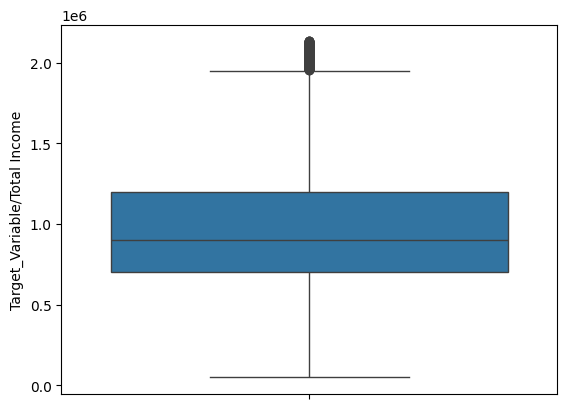

In [28]:
import seaborn as sns
sns.boxplot(y=df_settled_cleaned['Target_Variable/Total Income'])
plt.title("Boxplot of Total Income")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
Q1 = df_settled_cleaned['Target_Variable/Total Income'].quantile(0.25)
Q3 = df_settled_cleaned['Target_Variable/Total Income'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_settled_final_cleaned = df_settled_cleaned[(df_settled_cleaned['Target_Variable/Total Income'] >= lower_bound) &
              (df_settled_cleaned['Target_Variable/Total Income'] <= upper_bound)]
df_settled_final_cleaned.head(5)

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1032447758966470,MADHYA PRADESH,CENTRAL,M,VIDISHA,464001,VIDISHA,Ambar,M,"23.5131479,77.8207876",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,100.95,25.95,0.95,22.33,33.45,Poor,1.96,0.00,800000
1,1041885888252080,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Khapar Kheda,M,"22.7184042,78.2180971",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,82.60,22.76,0.94,27.94,42.54,Average,0.48,3.89,700000
2,1068465784357340,ODISHA,EAST,M,RAMGARH,754022,CUTTACK,Karanji,S,"20.649898,85.9164129",...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,91.92,17.60,0.95,26.98,40.98,Poor,0.34,0.00,1295000
3,1072440196043140,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Pondi,M,"22.7472362,78.3550004",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,96.85,19.01,0.93,24.97,37.73,Poor,0.35,0.00,800000
4,1073642021022590,MADHYA PRADESH,CENTRAL,M,ASHOKNAGAR,473330,ASHOKNAGAR,Amoda,M,"24.8491952,77.6157991",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,93.67,19.70,0.91,29.20,44.58,Average,0.82,0.00,750000


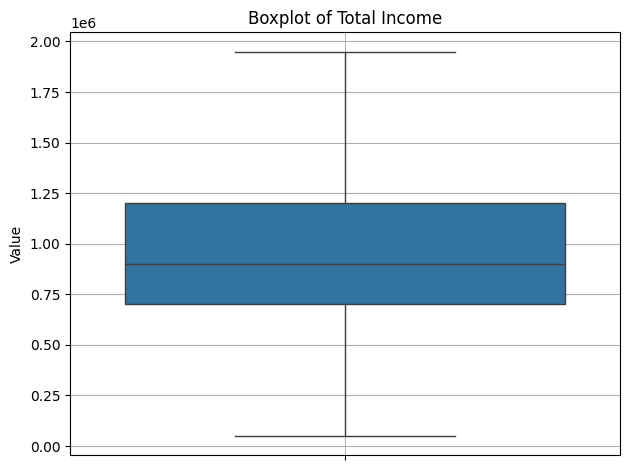

In [31]:
import seaborn as sns
sns.boxplot(y=df_settled_final_cleaned['Target_Variable/Total Income'])
plt.title("Boxplot of Total Income")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

ModuleNotFoundError: No module named 'sklearn'

In [33]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [34]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.3 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/8.7 MB 1.4 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.7 MB 1.4 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.7 MB 1.4 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.7 MB 1.4 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.7 MB 1.4 MB/s eta 0:00:05
   ------------- -------------------------- 

In [44]:
columns_to_scale = [
    'Perc_of_house_with_6plus_room',
    'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
    'perc_of_pop_living_in_hh_electricity',
    'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
    'mat_roof_Metal_GI_Asbestos_sheets',
    'perc_of_Wall_material_with_Burnt_brick',
    'Households_with_improved_Sanitation_Facility',
    'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'
]

X = df_settled_final_cleaned[columns_to_scale]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.87887292, -0.44758009,  0.14408467, ..., -0.19584059,
        -0.38116105,  1.25612453],
       [ 0.09660856, -0.42942799, -0.2609239 , ...,  0.75560506,
        -0.10849538,  1.24115265],
       [ 0.51869364, -0.30690135,  0.07044675, ..., -1.35877634,
        -0.79689205, -0.58292203],
       ...,
       [-0.12287569, -0.14807051,  0.43863635, ...,  0.35652791,
         1.53423114, -0.7002018 ],
       [-0.89388445, -0.15033952,  0.43194199, ..., -0.03683329,
         1.53170645, -0.58292203],
       [-0.55058858, -0.15487755,  0.43863635, ..., -0.14907373,
         1.51908304, -0.58541735]], shape=(28622, 8))

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# List your columns to combine
columns_to_combine = [
    'Perc_of_house_with_6plus_room',
    'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
    'perc_of_pop_living_in_hh_electricity',
    'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
    'mat_roof_Metal_GI_Asbestos_sheets',
    'perc_of_Wall_material_with_Burnt_brick',
    'Households_with_improved_Sanitation_Facility',
    'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'
]

# Subset the DataFrame
X = df_settled_final_cleaned[columns_to_combine]

# Standardize the features (if not already done)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 1 principal component
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)  # This gives an array of shape (n_samples, 1)

# Assign the single component back to DataFrame as a new column
df_settled_final_cleaned['Socio_Economic_Factors'] = principal_component.flatten()

# Now df has a new column 'Socio_Economic_Factors'


C:\Users\ayush\AppData\Local\Temp\ipykernel_10696\411548014.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_settled_final_cleaned['Socio_Economic_Factors'] = principal_component.flatten()


In [46]:
df_settled_final_cleaned.head()

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income,Socio_Economic_Factors
0,1032447758966470,MADHYA PRADESH,CENTRAL,M,VIDISHA,464001,VIDISHA,Ambar,M,"23.5131479,77.8207876",...,100.95,25.95,0.95,22.33,33.45,Poor,1.96,0.00,800000,0.559606
1,1041885888252080,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Khapar Kheda,M,"22.7184042,78.2180971",...,82.60,22.76,0.94,27.94,42.54,Average,0.48,3.89,700000,0.593480
2,1068465784357340,ODISHA,EAST,M,RAMGARH,754022,CUTTACK,Karanji,S,"20.649898,85.9164129",...,91.92,17.60,0.95,26.98,40.98,Poor,0.34,0.00,1295000,-0.544752
3,1072440196043140,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Pondi,M,"22.7472362,78.3550004",...,96.85,19.01,0.93,24.97,37.73,Poor,0.35,0.00,800000,0.593480
4,1073642021022590,MADHYA PRADESH,CENTRAL,M,ASHOKNAGAR,473330,ASHOKNAGAR,Amoda,M,"24.8491952,77.6157991",...,93.67,19.70,0.91,29.20,44.58,Average,0.82,0.00,750000,-0.353747


In [47]:
df_settled_final_cleaned.to_csv('Final_settled_clean')

In [48]:
columns_to_combine = [
    'Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022',
  'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022',
  'Rabi Seasons Seasonal average groundwater thickness (cm) in 2021',
  'Kharif Seasons Seasonal average groundwater thickness (cm) in 2021',
  'Kharif Seasons Seasonal average groundwater thickness (cm) in 2020',
  'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020'
]

# Subset the DataFrame
X = df_settled_final_cleaned[columns_to_combine]

# Standardize the features (if not already done)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 1 principal component
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)  # This gives an array of shape (n_samples, 1)

# Assign the single component back to DataFrame as a new column
df_settled_final_cleaned['Avg_Groundwater_Thickness'] = principal_component.flatten()

C:\Users\ayush\AppData\Local\Temp\ipykernel_10696\539902635.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_settled_final_cleaned['Avg_Groundwater_Thickness'] = principal_component.flatten()


In [49]:
df_settled_final_cleaned.head()

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income,Socio_Economic_Factors,Avg_Groundwater_Thickness
0,1032447758966470,MADHYA PRADESH,CENTRAL,M,VIDISHA,464001,VIDISHA,Ambar,M,"23.5131479,77.8207876",...,25.95,0.95,22.33,33.45,Poor,1.96,0.00,800000,0.559606,2.209283
1,1041885888252080,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Khapar Kheda,M,"22.7184042,78.2180971",...,22.76,0.94,27.94,42.54,Average,0.48,3.89,700000,0.593480,-0.886476
2,1068465784357340,ODISHA,EAST,M,RAMGARH,754022,CUTTACK,Karanji,S,"20.649898,85.9164129",...,17.60,0.95,26.98,40.98,Poor,0.34,0.00,1295000,-0.544752,1.671373
3,1072440196043140,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Pondi,M,"22.7472362,78.3550004",...,19.01,0.93,24.97,37.73,Poor,0.35,0.00,800000,0.593480,0.977185
4,1073642021022590,MADHYA PRADESH,CENTRAL,M,ASHOKNAGAR,473330,ASHOKNAGAR,Amoda,M,"24.8491952,77.6157991",...,19.70,0.91,29.20,44.58,Average,0.82,0.00,750000,-0.353747,1.158505


In [55]:
columns_to_combine = [
    'Kharif Seasons  Seasonal average groundwater replenishment rate (cm) in 2022',
  'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2022',
  'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2021',
  'Kharif Seasons Seasonal average groundwater replenishment rate (cm) in 2021',
  'Kharif Seasons Seasonal average groundwater replenishment rate (cm) in 2020',
  'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020'
]

# Subset the DataFrame
X = df_settled_final_cleaned[columns_to_combine]
# Standardize the features (if not already done)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 1 principal component
pca = PCA(n_components=1)
principal_component = pca.fit_transform(X_scaled)  # This gives an array of shape (n_samples, 1)

# Assign the single component back to DataFrame as a new column
df_settled_final_cleaned['Avg_Replenishment_Rate'] = principal_component.flatten()

C:\Users\ayush\AppData\Local\Temp\ipykernel_10696\3049736615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_settled_final_cleaned['Avg_Replenishment_Rate'] = principal_component.flatten()


In [56]:
df_settled_final_cleaned.head()


,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income,Socio_Economic_Factors,Avg_Groundwater_Thickness,Avg_Replenishment_Rate
0,1032447758966470,MADHYA PRADESH,CENTRAL,M,VIDISHA,464001,VIDISHA,Ambar,M,"23.5131479,77.8207876",...,0.95,22.33,33.45,Poor,1.96,0.00,800000,0.559606,2.209283,0.821588
1,1041885888252080,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Khapar Kheda,M,"22.7184042,78.2180971",...,0.94,27.94,42.54,Average,0.48,3.89,700000,0.593480,-0.886476,0.721864
2,1068465784357340,ODISHA,EAST,M,RAMGARH,754022,CUTTACK,Karanji,S,"20.649898,85.9164129",...,0.95,26.98,40.98,Poor,0.34,0.00,1295000,-0.544752,1.671373,0.399861
3,1072440196043140,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Pondi,M,"22.7472362,78.3550004",...,0.93,24.97,37.73,Poor,0.35,0.00,800000,0.593480,0.977185,-0.728308
4,1073642021022590,MADHYA PRADESH,CENTRAL,M,ASHOKNAGAR,473330,ASHOKNAGAR,Amoda,M,"24.8491952,77.6157991",...,0.91,29.20,44.58,Average,0.82,0.00,750000,-0.353747,1.158505,-1.417089
